In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
data='StudentsPerformance.csv'

In [4]:
df=pd.read_csv(data)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

### The data consist of 1000 entries with 8 columns
 1. **Gender**- male/female
 2. **race/ethnicity**- consist of groups from A-E
 3. **parental level of education**- Heighest level of education
 4. **lunch**- standard and fee/reduced
 5. **test preparation course**- none/completed
 6. **math scores**
 7. **reading scores**
 8. **writing scores**

Renaming for ease of access

In [6]:
df.rename(columns={
    "race/ethnicity":"groups",
    "parental level of education":"education",
    "test preparation course":"preparation"
}, inplace=True)

In [7]:
df.head()

,gender,groups,education,lunch,preparation,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## **Visualisations and Analyzing the Data**

In [8]:

from plotly.offline import download_plotlyjs , init_notebook_mode , plot , iplot
init_notebook_mode(connected=True)
import plotly.express as px

In [9]:
fig=px.bar(data_frame=df,x="groups",y="education",color="education",
           title="Parental Level of education VS Groupd")
plot(fig)

'temp-plot.html'

The graph above tell us that we the heighest entries from group C then group D and so on . The colors denote the proportions of parental levels of educations.

**Let us add a new column that has the average score derived from the average of the three- maths, reading and writing scores**

In [10]:
df['avg score']=round((df['math score']+df["reading score"]
                       + df['writing score'])/3.0,2)
df.head()

,gender,groups,education,lunch,preparation,math score,reading score,writing score,avg score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33
4,male,group C,some college,standard,none,76,78,75,76.33


### **Total scores of all groups with with different subjects**

In [11]:
fig=px.pie(df,values="math score", names="groups",color="groups",
          title="Total Added Maths Score of Different Groups",
           color_discrete_sequence=px.colors.sequential.Blues,hole=.3)
plot(fig)

'temp-plot.html'

In [12]:
fig=px.pie(df,values='reading score', names='groups',color='groups',
          title='Total Added Reading Score of Different Groups',
           color_discrete_sequence=px.colors.sequential.Blues,hole=.3)
plot(fig)

'temp-plot.html'

In [13]:
fig=px.pie(df,values='writing score', names="groups",color="groups",
          title="Total Added Reading Score of Different Groups",
           color_discrete_sequence=px.colors.sequential.Blues,hole=.3)
plot(fig)

'temp-plot.html'

 **Let's compare the same scores vs groups using the average scores**

Text(0.5, 0, ' ')

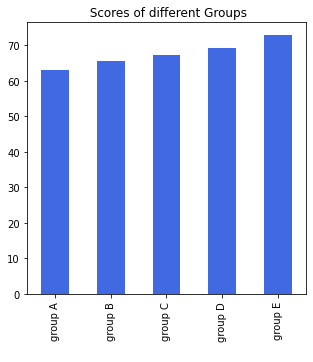

In [14]:
plt.figure(figsize=(5,5))
df.groupby("groups")["avg score"].aggregate('mean').plot(kind="bar",
                                                         color="royalblue")
plt.title(" Scores of different Groups")
plt.xlabel(" ")

**The chart shows the avg of all the subjects where we could finally conclude that Group E has the best result.**

### **Checking the null values**

In [15]:
df.isnull().sum()

gender           0
groups           0
education        0
lunch            0
preparation      0
math score       0
reading score    0
writing score    0
avg score        0
dtype: int64

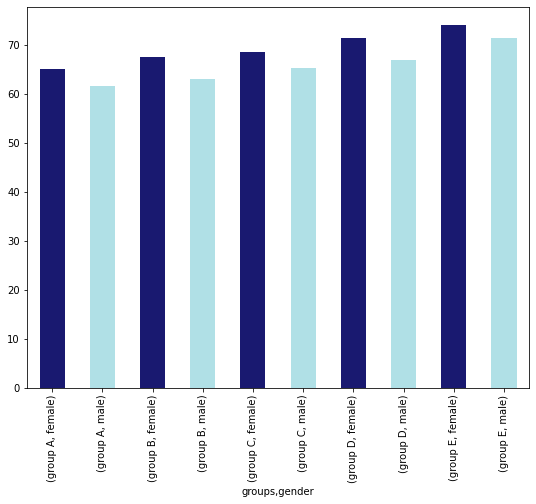

In [16]:
plt.figure(figsize=(9,7))
df.groupby(["groups","gender"])["avg score"].aggregate("mean").plot(kind="bar",color=["MidnightBlue","Powderblue"])
plt.xticks(rotation=90)
plt.show()

In the above graph we observe Group E females score more marks then males of Group E

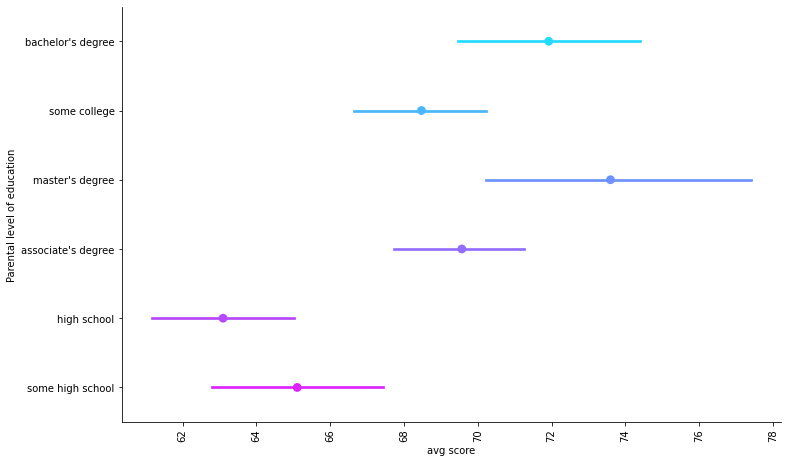

<Figure size 720x720 with 0 Axes>

In [17]:
sns.catplot(y="education",x="avg score", kind='point',
            data=df,palette="cool",height=6.5,aspect=1.7)
plt.xticks(rotation=90)
plt.ylabel("Parental level of education")
plt.figure(figsize=(10,10))
plt.show()

From the graph above, overall observation tells us that student's who have their highest level of education as master's degree are getting the highest marks than others.

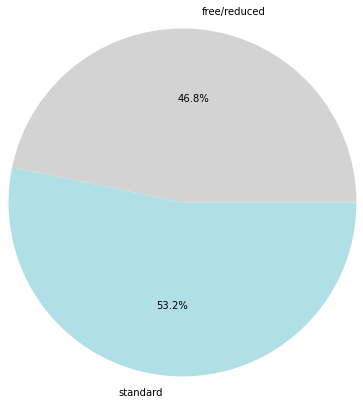

In [18]:
df.groupby('lunch')["avg score"].aggregate('mean').plot(
 kind='pie',colors=['lightgrey','powderblue'],autopct='%1.1f%%',radius=2)
plt.ylabel('')
plt.show() 

People who have opted for standard lunch are ahead in their final average scores,as the standard region covers 53.2% of the whole region.

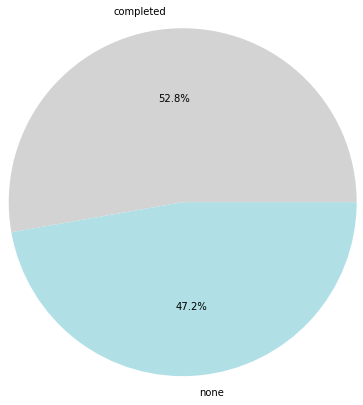

In [19]:
df.groupby('preparation')['avg score'].aggregate('mean').plot(
kind='pie', colors=['lightgray','powderblue'],autopct='%1.1f%%',radius=2)
plt.ylabel('')
plt.show()

Those who have completed their test preparation course have a slight higher average score, as the completed region covers 52.8% of the whole region.

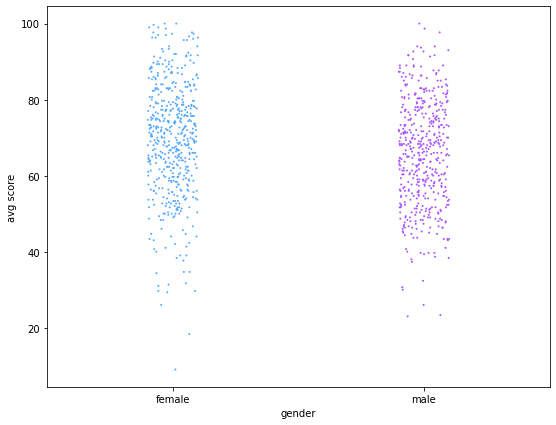

In [20]:
plt.figure(figsize=(9,7))
sns.stripplot(x='gender',y='avg score',data=df,palette='cool',size=2)
plt.show()

From above graph ,overall observation tells that female students have higher average marks then male students

In [21]:
df.groupby("gender")[['gender','avg score']
                    ].aggregate('mean').sort_values(by='avg score')

,avg score
gender,
male,65.837303
female,69.569498


Females tend to have a their edge a bit over then the males.

**Top 20 to score heighest in maths**

In [22]:
df[['groups','education','math score','avg score'
   ]].sort_values(by='math score',ascending=False).head(20).style.background_gradient()

,groups,education,math score,avg score
962,group E,associate's degree,100,100.000000
625,group D,some college,100,98.670000
458,group E,bachelor's degree,100,100.000000
623,group A,some college,100,94.000000
451,group E,some college,100,96.330000
149,group E,associate's degree,100,97.670000
916,group E,bachelor's degree,100,100.000000
263,group E,high school,99,94.000000
306,group E,some college,99,89.000000
114,group E,bachelor's degree,99,99.670000


In [23]:
#Bottom 10
df[['groups','education','math score','avg score'
   ]].sort_values(by='math score').head(10).style.background_gradient("RdPu")

,groups,education,math score,avg score
59,group C,some high school,0,9.000000
980,group B,high school,8,18.330000
17,group B,some high school,18,26.000000
787,group B,some college,19,29.670000
145,group C,some college,22,31.330000
842,group B,high school,23,34.330000
338,group B,some high school,24,29.670000
466,group D,associate's degree,26,31.670000
91,group C,high school,27,32.330000
363,group D,some high school,27,31.000000


**Top 20 highest score in reading**

In [24]:
df[['groups','education','reading score','avg score'
   ]].sort_values(by='reading score',ascending=False).head(20).style.background_gradient()

,groups,education,reading score,avg score
546,group A,some high school,100,96.330000
970,group D,bachelor's degree,100,96.330000
149,group E,associate's degree,100,97.670000
566,group E,bachelor's degree,100,97.330000
712,group D,some college,100,99.000000
179,group D,some high school,100,99.000000
886,group E,associate's degree,100,96.000000
381,group C,associate's degree,100,94.000000
106,group D,master's degree,100,95.670000
903,group D,bachelor's degree,100,97.670000


In [25]:
#Bottom 10
df[['groups','education','reading score','avg score'
   ]].sort_values(by='reading score').head(10).style.background_gradient("RdPu")

,groups,education,reading score,avg score
59,group C,some high school,17,9.000000
327,group A,some college,23,23.330000
596,group B,high school,24,23.000000
980,group B,high school,24,18.330000
76,group E,some high school,26,26.000000
211,group C,some college,28,30.000000
601,group C,high school,29,29.330000
896,group B,high school,29,30.670000
466,group D,associate's degree,31,31.670000
810,group A,some high school,31,39.330000


**Top 20 to score highest in writing**

In [26]:
df[["groups","education","writing score","avg score"
]].sort_values(by="writing score",ascending=False).head(20).style.background_gradient()

,groups,education,writing score,avg score
179,group D,some high school,100,99.000000
114,group E,bachelor's degree,100,99.670000
903,group D,bachelor's degree,100,97.670000
403,group D,high school,100,95.670000
458,group E,bachelor's degree,100,100.000000
957,group D,master's degree,100,97.330000
962,group E,associate's degree,100,100.000000
970,group D,bachelor's degree,100,96.330000
165,group C,bachelor's degree,100,98.670000
916,group E,bachelor's degree,100,100.000000


In [27]:
#Bottom 10
df[["groups","education","writing score","avg score"
   ]].sort_values(by="writing score").head(10).style.background_gradient("RdPu")

,groups,education,writing score,avg score
59,group C,some high school,10,9.000000
596,group B,high school,15,23.000000
327,group A,some college,19,23.330000
76,group E,some high school,22,26.000000
980,group B,high school,23,18.330000
338,group B,some high school,27,29.670000
896,group B,high school,27,30.670000
211,group C,some college,27,30.000000
17,group B,some high school,28,26.000000
601,group C,high school,30,29.330000


**Our top 10**

In [28]:
df[["groups","education","avg score"
]].sort_values(by="avg score",ascending=False).head(10).style.background_gradient("YlGn")

,groups,education,avg score
916,group E,bachelor's degree,100.000000
458,group E,bachelor's degree,100.000000
962,group E,associate's degree,100.000000
114,group E,bachelor's degree,99.670000
179,group D,some high school,99.000000
712,group D,some college,99.000000
165,group C,bachelor's degree,98.670000
625,group D,some college,98.670000
903,group D,bachelor's degree,97.670000
149,group E,associate's degree,97.670000


In [30]:
df.corr()

,math score,reading score,writing score,avg score
math score,1.000000,0.817580,0.802642,0.918744
reading score,0.817580,1.000000,0.954598,0.970331
writing score,0.802642,0.954598,1.000000,0.965669
avg score,0.918744,0.970331,0.965669,1.000000


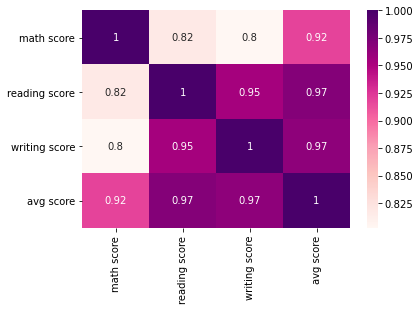

In [38]:
sns.heatmap(df.corr(),cmap='RdPu',annot=True)
plt.xticks(rotation=90)
plt.show()


In [39]:
num = int(input("Enter a number: "))

# prime numbers are greater than 1
if num > 1:
   # check for factors
   for i in range(2,num):
       if (num % i) == 0:
           print(num,"is not a prime number")
           print(i,"times",num//i,"is",num)
           break
   else:
       print(num,"is a prime number")
       
# if input number is less than
# or equal to 1, it is not prime
else:
   print(num,"is not a prime number")

Enter a number:  43


43 is a prime number
